# Created by - Swati Pandey (Batch - October 2022)

Thanking to LetsGrowMore and Respected Aman Kesarwami sir for giving this golden opportunity to learn,improve and enhance my skills in the field of DataScience.
Also, i would like to thanks respected Krish Naik sir for your informative youtube video
video link : https://www.youtube.com/watch?v=H6du_pfuznE&t=128s

References:
https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/

Contact me:
linkedin: https://www.linkedin.com/in/swati-pandey-380989230/




# Approach : - 
             1.Data Acquistion
             2.Data Preprocessing
             3.Visualization 
             4.Feature Scaling
             5.Train Test Split 
             6.Create a stacked LSTM model
             7.Predict future 30 days and plot the output

Dataset Link : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [1]:
## Importing necessary libraries
import pandas as pd ## for Data wrangling purpose
import numpy as np ## Basic Computation library
import matplotlib.pyplot as plt ## Plotting package
%matplotlib inline
import seaborn as sns ##for visualization
import warnings ## For filter warnings
warnings.filterwarnings("ignore")

# Data Acquistion

In [2]:
## reading csv file
## Using parse_dates so that panda recongnize Date column as date not as string.

Tata_df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv",parse_dates=[0])

In [3]:
Tata_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
Tata_df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
## size of the dataset
Tata_df.shape

(2035, 8)

2035 rows and 8 columns present in dataset.

In [6]:
## information about dataset
Tata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


So, there is not any missing value present in dataset. Date datatype has also changed from string to datetime.

In [7]:
## Again checking for null/missing values present
Tata_df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [8]:
## Checking statistics of dataset
Tata_df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


According to statistics provided by describe method , data seems to be normally distributed.

I have a very clean and sorted dataset, So I'll proceed to next step.

# Visualization

# Univaraite Analysis

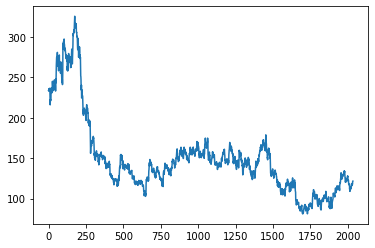

In [9]:
plt.plot(Tata_df.Close)

<AxesSubplot:>

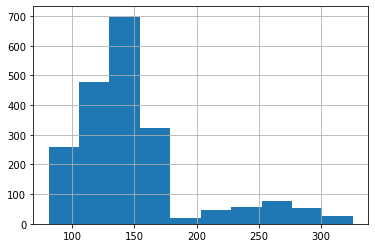

In [10]:
Tata_df.Close.hist()

So from this plot, Most of stocks Closing prices ranges between 100 to 170rs.

In [11]:
# Sort Dataframe in date order, While working with time series data, It's a good practice to sort data in ascending order since
# next data is dependent on previous time step data.

Tata_df.sort_values(by=["Date"], inplace=True, ascending=True)
Tata_df.Date.head()


2034   2010-07-21
2033   2010-07-22
2032   2010-07-23
2031   2010-07-26
2030   2010-07-27
Name: Date, dtype: datetime64[ns]

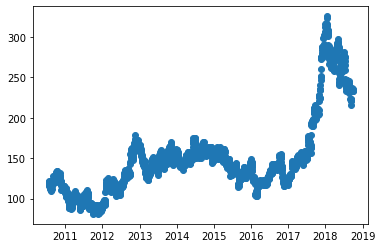

In [12]:
plt.scatter(Tata_df.Date,Tata_df.Close)

# Making a copy of Original DataFrame

In [13]:
## Creating new dataframe 
df_copy= Tata_df.copy()
df_copy

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [14]:
df_copy.reset_index(inplace = True)

In [15]:
df_copy

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...,...
2030,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [16]:
df_copy.drop("index", axis =1, inplace = True)

In [17]:
df_copy

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
2030,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


Text(0.5, 1.0, 'Variation of Closing price with different Date year')

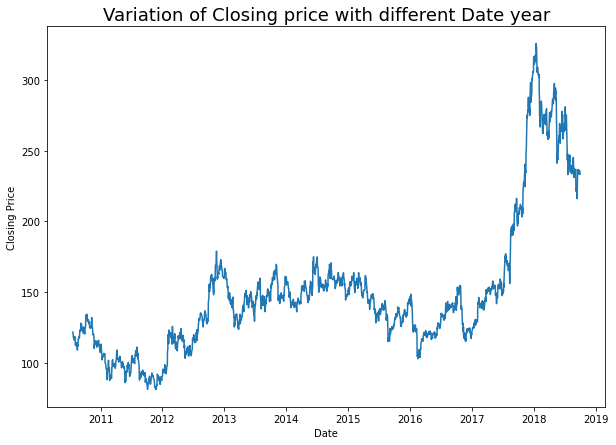

In [18]:
plt.figure(figsize=(10,7))
plt.plot(df_copy["Date"],
         df_copy["Close"])
plt.xlabel("Date")
plt.ylabel("Closing Price");
plt.title("Variation of Closing price with different Date year",
          fontsize=18)


WE can see here, that from 2017 closing price has increased for Tata
Global stock price.

# Correlation

<AxesSubplot:>

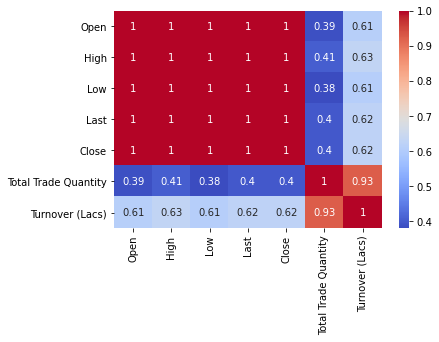

In [19]:
sns.heatmap(df_copy.corr(),annot= True,cmap = 'coolwarm')

So, we can see here that Open, High, Low, Last, Close ,they are strongly
correlated with each other.

# Selecting Close as target variable for prediction


In [20]:
closingprice_df = df_copy['Close']
closingprice_df

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [21]:
closingprice_df.shape

(2035,)

In [22]:
closingprice_df.describe()

count    2035.00000
mean      149.45027
std        48.71204
min        80.95000
25%       120.05000
50%       141.25000
75%       156.90000
max       325.75000
Name: Close, dtype: float64

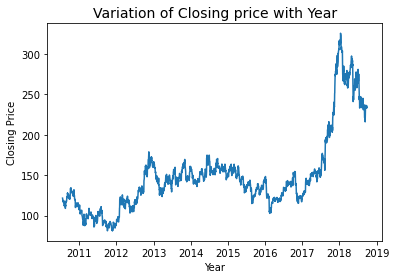

In [23]:
plt.plot(df_copy.Date, closingprice_df)
plt.xlabel("Year")
plt.ylabel("Closing Price");
plt.title("Variation of Closing price with Year",
          fontsize=14);


# Feature Scaling with MinMax Scaler

In [24]:
### LSTM are sensitive to the scale of the data.  For Open price min price is 81 and max is 327 rs,So I'll apply MinMax scaler 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
closingprice_df=scaler.fit_transform(np.array(closingprice_df).reshape(-1,1))
closingprice_df

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

Now all prices are in range 0 to 1.

# Train Test Split

In [25]:
##splitting dataset into train and test split
training_size=int(len(closingprice_df)*0.70)
test_size=len(closingprice_df)-training_size
train_data,test_data=closingprice_df[0:training_size,:],closingprice_df[training_size:len(closingprice_df),:1]


In [26]:
train_data.shape,test_data.shape

((1424, 1), (611, 1))

Since Stock prices are time sensitive data, So for predicting next 30 days price, I have taken previous 100 days stock 
Close price.

In [27]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
   # print(dataX) 
    #print(dataY)
    return np.array(dataX), np.array(dataY)


In [28]:
len(train_data),len(test_data)

(1424, 611)

In [29]:
train_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.15012255],
       [0.15747549],
       [0.15277778]])

In [30]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [31]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1323, 100), (1323,), (510, 100), (510,))

# Reshape input to be [samples, time steps, features] which is required for LSTM


In [32]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [33]:
# Create the Stacked LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [34]:
model=Sequential()
model.add(LSTM(50,return_sequences = True,input_shape=(100,1))) # Input layer,We are working with a univariate series, so the number of features is one,
model.add(LSTM(50,return_sequences = True)) ## numberOfLSTMunits =50
model.add(LSTM(50)) ## numberOfLSTMunits = 50
model.add(Dense(1)) ## Output Layer
model.compile(loss='mean_squared_error',optimizer='adam')


In [35]:
## Checking for trainable parameters
model.count_params()

50851

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


## understandig model summary:
We know LSTM has four functional units 3 sigmoid and one tanh.

Formula for calculating params in lstm layer :
4*(n+m+b)*m, where n dimension of input vector, m =number of lstm units and b is bias which is initialized with 1 always.
so 4 *(1+50+1)*50 =10400



In [37]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
21/21 [==============================] - 14s 334ms/step - loss: 0.0122 - val_loss: 0.0332
Epoch 2/100
21/21 [==============================] - 5s 238ms/step - loss: 0.0019 - val_loss: 0.0061
Epoch 3/100
21/21 [==============================] - 5s 226ms/step - loss: 9.9590e-04 - val_loss: 0.0041
Epoch 4/100
21/21 [==============================] - 5s 227ms/step - loss: 9.2028e-04 - val_loss: 0.0053
Epoch 5/100
21/21 [==============================] - 5s 239ms/step - loss: 8.8788e-04 - val_loss: 0.0053
Epoch 6/100
21/21 [==============================] - 5s 229ms/step - loss: 8.3938e-04 - val_loss: 0.0039
Epoch 7/100
21/21 [==============================] - 5s 226ms/step - loss: 8.0062e-04 - val_loss: 0.0061
Epoch 8/100
21/21 [==============================] - 5s 228ms/step - loss: 7.6371e-04 - val_loss: 0.0037
Epoch 9/100
21/21 [==============================] - 5s 225ms/step - loss: 7.2149e-04 - val_loss: 0.0063
Epoch 10/100
21/21 [==============================] - 5s 227ms

21/21 [==============================] - 5s 226ms/step - loss: 1.4756e-04 - val_loss: 4.5853e-04
Epoch 78/100
21/21 [==============================] - 5s 226ms/step - loss: 1.4047e-04 - val_loss: 4.0641e-04
Epoch 79/100
21/21 [==============================] - 5s 230ms/step - loss: 1.7214e-04 - val_loss: 4.8644e-04
Epoch 80/100
21/21 [==============================] - 5s 227ms/step - loss: 1.5344e-04 - val_loss: 4.1971e-04
Epoch 81/100
21/21 [==============================] - 5s 227ms/step - loss: 1.5799e-04 - val_loss: 5.3184e-04
Epoch 82/100
21/21 [==============================] - 5s 227ms/step - loss: 1.4814e-04 - val_loss: 4.0838e-04
Epoch 83/100
21/21 [==============================] - 5s 230ms/step - loss: 1.4490e-04 - val_loss: 5.3932e-04
Epoch 84/100
21/21 [==============================] - 5s 225ms/step - loss: 1.5281e-04 - val_loss: 4.1781e-04
Epoch 85/100
21/21 [==============================] - 5s 224ms/step - loss: 1.6749e-04 - val_loss: 5.8574e-04
Epoch 86/100
21/21 [===

In [38]:
model.save('stock_model.h5')

# Visualizing Loss Function

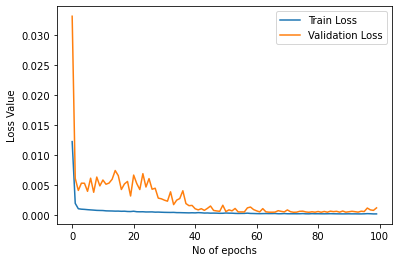

In [39]:
plt.plot(history.history['loss'],label ='Train Loss' )
plt.plot(history.history['val_loss'],label = 'Validation Loss')
plt.xlabel("No of epochs")
plt.ylabel("Loss Value")
plt.legend()

Loss has been decreased significantly with increasing no of epochs.

# Lets Do the prediction and check performance metrics

In [40]:
##Transformback to original form
train_predict=scaler.inverse_transform(model.predict(X_train))
test_predict=scaler.inverse_transform(model.predict(X_test))


In [41]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error,r2_score
print(math.sqrt(mean_squared_error(y_train,train_predict)))


133.02357389934377


In [42]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))


207.1945330638114

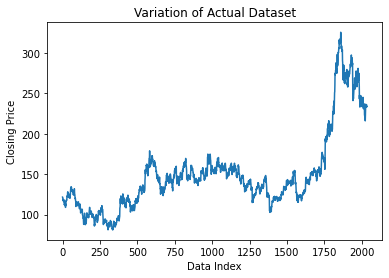

In [43]:
### Plotting 
# shift train predictions for plotting
look_back=100 ## To check predicted and actual on same curve
trainPredictPlot = np.empty_like(closingprice_df) ## To create a new array with the same shape and type as given arrary
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(closingprice_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closingprice_df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(closingprice_df))
plt.title("Variation of Actual Dataset")
plt.xlabel("Data Index")
plt.ylabel("Closing Price")
plt.show()


Text(0, 0.5, 'Closing price')

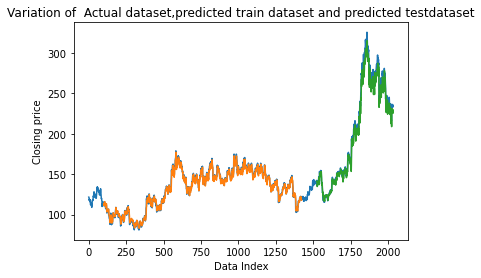

In [44]:
plt.plot(scaler.inverse_transform(closingprice_df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title("Variation of  Actual dataset,predicted train dataset and predicted testdataset")
plt.xlabel("Data Index")
plt.ylabel("Closing price")



Blue present -Original dataset
Orange - Predicted train dataset
green - Predicted test dataset

# Forecasting for future 30 days

## Considering last 100 days for future prediction.

In [45]:
x_input=test_data[511:].reshape(1,-1) ## len of test data - 100 = (611 -100 =511) and reshaping into row matrix
x_input.shape


(1, 100)

In [46]:
temp_input=list(x_input)
len(temp_input)


1

In [47]:
temp_input=temp_input[0].tolist()
len(temp_input)

100

In [49]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
       # print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)


In [50]:
latest_100days=np.arange(1,101)
pred_30days=np.arange(101,131)


In [51]:
len(closingprice_df)

2035

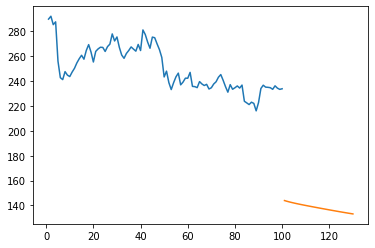

In [52]:
plt.plot(latest_100days,scaler.inverse_transform(closingprice_df[1935:]))
plt.plot(pred_30days,scaler.inverse_transform(lst_output))


## Since Graph is discontinuous, So to smooth it, I will do following steps:

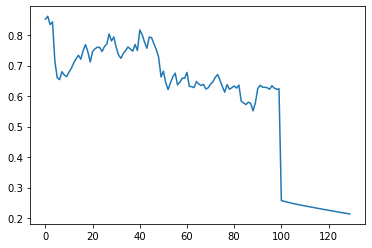

In [53]:
df2=closingprice_df.tolist()
df2.extend(lst_output)
plt.plot(df2[1935:])


In [54]:
df2=scaler.inverse_transform(df2).tolist()


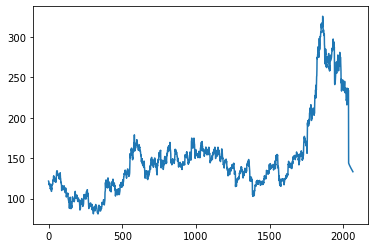

In [55]:
plt.plot(df2)
